In [1]:
# Este código intenta buscar factores en el dataframe ya etiquetado o labeled
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import matplotlib as plt
import warnings
import seaborn as sns
import requests
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
from sqlalchemy import create_engine
import pymysql
import seaborn as sns
from datetime import datetime, timedelta
from datetime import datetime
import re
import time
import ast
from datetime import datetime
from finvizfinance.screener.overview import Overview
from finvizfinance.quote import finvizfinance
import yfinance as yf
from yahoo_fin import news as yf_news
now = datetime.now()
# Format the date and time as a string
date_str = now.strftime("%Y%m%d")
pd.set_option("display.max_colwidth", 150)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
directory = 'input'
filename = 'labeled_biothec_2024-12-17.csv'

file_path = os.path.join(directory, filename)
df = pd.read_csv(file_path)

In [3]:
df

,Ticker,Company,ipo_date,MarketCap_M,Employees,Volume_m,revenueM,ebitdaM,web,Country,Industry,BusinessSummary,ipo_price,Price,Fall,days,RoK,term,profit,animal
0,TECH,Bio-Techne Corp,1989-02-09,12101.22,3100,922.00,1171.58,308.52,https://www.bio-techne.com,USA,Biotechnology,"Bio-Techne Corporation, together with its subsidiaries, develops, manufactures, and sells life science reagents, instruments, and services for the...",0.09,75.69,82131.76,13095,2.55,Old,Alive,Mamut
1,VRTX,"Vertex Pharmaceuticals, Inc",1991-07-24,120546.75,5400,1171.00,10625.80,4446.60,https://www.vrtx.com,USA,Biotechnology,"Vertex Pharmaceuticals Incorporated, a biotechnology company, engages in developing and commercializing therapies for treating cystic fibrosis (CF...",4.50,463.73,10205.11,12200,3.69,Old,Alive,Mamut
2,UTHR,United Therapeutics Corp,1999-06-17,16644.81,1168,330.00,2756.20,1412.10,https://www.unither.com,USA,Biotechnology,"United Therapeutics Corporation, a biotechnology company, engages in the development and commercialization of products to address the unmet medica...",6.09,361.81,5837.39,9315,8.48,Old,Alive,Mamut
3,INCY,Incyte Corp,1993-11-04,13446.97,2524,2066.00,4075.86,80.49,https://www.incyte.com,USA,Biotechnology,"Incyte Corporation, a biopharmaceutical company, engages in the discovery, development, and commercialization of therapeutics for hematology/oncol...",1.88,68.55,3556.00,11366,0.60,Old,Alive,Mamut
4,ALNY,Alnylam Pharmaceuticals Inc,2004-06-01,31470.08,2100,772.00,2094.80,-132.15,https://www.alnylam.com,USA,Biotechnology,"Alnylam Pharmaceuticals, Inc., a biopharmaceutical company, focuses on discovering, developing, and commercializing novel therapeutics based on ri...",7.00,245.44,3406.29,7504,-0.42,Old,Alive,Mamut
5,REGN,"Regeneron Pharmaceuticals, Inc",1991-04-02,79655.96,14165,814.00,13847.10,4598.00,https://www.regeneron.com,USA,Biotechnology,"Regeneron Pharmaceuticals, Inc. discovers, invents, develops, manufactures, and commercializes medicines for treating various diseases worldwide. ...",21.12,731.30,3361.78,12313,5.77,Old,Alive,Mamut
6,ARGX,Argen X SE ADR,2017-05-18,37829.53,1148,262.00,1908.66,-150.08,https://www.argenx.com,Netherlands,Biotechnology,"argenx SE, a biotechnology company, engages in the developing of various therapies for the treatment of autoimmune diseases in the United States, ...",23.00,607.21,2540.02,2770,-0.40,Old,Alive,Mamut
7,BHST,BioHarvest Sciences Inc,2021-01-08,106.57,0,7.00,19.13,-7.21,https://www.bioharvest.com,Canada,Biotechnology,BioHarvest Sciences Inc. operates as a biotechnology company. The company operates through Nutraceuticals and Pharmaceuticals segments. It develop...,0.29,6.15,2020.69,1439,-6.77,New,Alive,Gacela
8,KRYS,Krystal Biotech Inc,2017-09-20,4820.55,229,233.00,241.52,69.14,https://www.krystalbio.com,USA,Biotechnology,"Krystal Biotech, Inc., a commercial-stage biotechnology company, discovers, develops, and commercializes genetic medicines for patients with rare ...",10.64,163.64,1437.97,2645,1.43,Old,Alive,Mamut
9,TVTX,Travere Therapeutics Inc,2012-11-08,1523.10,380,1695.00,203.45,-238.74,https://www.travere.com,USA,Biotechnology,"Travere Therapeutics, Inc., a biopharmaceutical company, identifies, develops, and delivers therapies to people living with rare kidney and metabo...",1.50,17.32,1054.67,4422,-15.67,Old,Alive,Mamut


In [4]:
df[['Ticker', 'Company','Fall','days','RoK','MarketCap_M', 'revenueM','ebitdaM','Employees','term','profit','animal']]

,Ticker,Company,Fall,days,RoK,MarketCap_M,revenueM,ebitdaM,Employees,term,profit,animal
0,TECH,Bio-Techne Corp,82131.76,13095,2.55,12101.22,1171.58,308.52,3100,Old,Alive,Mamut
1,VRTX,"Vertex Pharmaceuticals, Inc",10205.11,12200,3.69,120546.75,10625.80,4446.60,5400,Old,Alive,Mamut
2,UTHR,United Therapeutics Corp,5837.39,9315,8.48,16644.81,2756.20,1412.10,1168,Old,Alive,Mamut
3,INCY,Incyte Corp,3556.00,11366,0.60,13446.97,4075.86,80.49,2524,Old,Alive,Mamut
4,ALNY,Alnylam Pharmaceuticals Inc,3406.29,7504,-0.42,31470.08,2094.80,-132.15,2100,Old,Alive,Mamut
5,REGN,"Regeneron Pharmaceuticals, Inc",3361.78,12313,5.77,79655.96,13847.10,4598.00,14165,Old,Alive,Mamut
6,ARGX,Argen X SE ADR,2540.02,2770,-0.40,37829.53,1908.66,-150.08,1148,Old,Alive,Mamut
7,BHST,BioHarvest Sciences Inc,2020.69,1439,-6.77,106.57,19.13,-7.21,0,New,Alive,Gacela
8,KRYS,Krystal Biotech Inc,1437.97,2645,1.43,4820.55,241.52,69.14,229,Old,Alive,Mamut
9,TVTX,Travere Therapeutics Inc,1054.67,4422,-15.67,1523.10,203.45,-238.74,380,Old,Alive,Mamut


Empresas con Beneficios según tamaño capital > 600 M o empleados >100

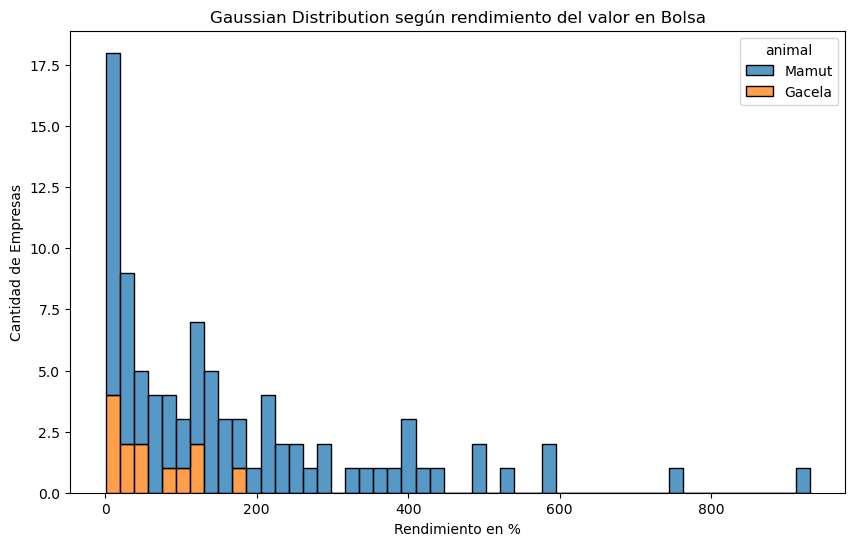

In [5]:
plt.figure(figsize=(10, 6))
df_filtered = df[(df['Fall'] >= 0) & (df['Fall'] <= 1000)]

sns.histplot(x='Fall', hue='animal', data=df_filtered, bins=50,  multiple='stack')
plt.title("Gaussian Distribution según rendimiento del valor en Bolsa")
plt.xlabel("Rendimiento en %")
plt.ylabel("Cantidad de Empresas")
plt.show()

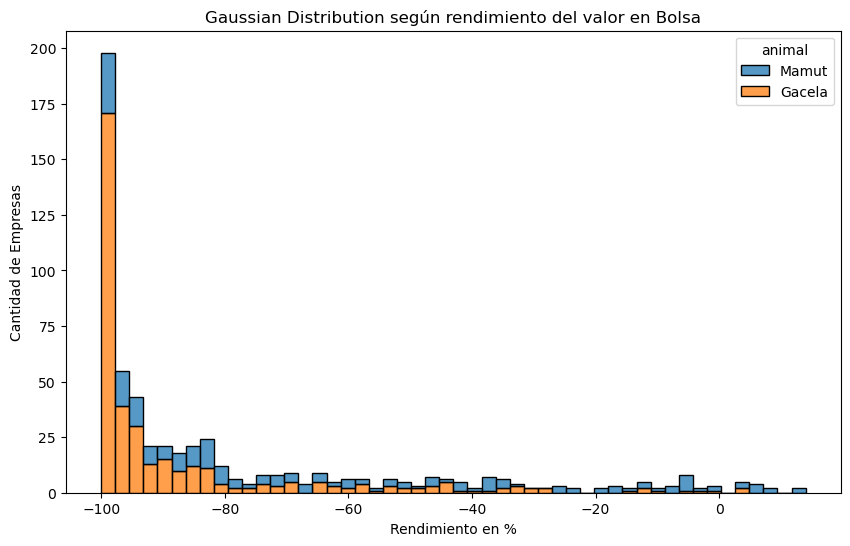

In [6]:
plt.figure(figsize=(10, 6))
df_filtered = df[(df['Fall'] >= -150) & (df['Fall'] <= 15)]

sns.histplot(x='Fall', hue='animal', data=df_filtered, bins=50,  multiple='stack')
plt.title("Gaussian Distribution según rendimiento del valor en Bolsa")
plt.xlabel("Rendimiento en %")
plt.ylabel("Cantidad de Empresas")
plt.show()

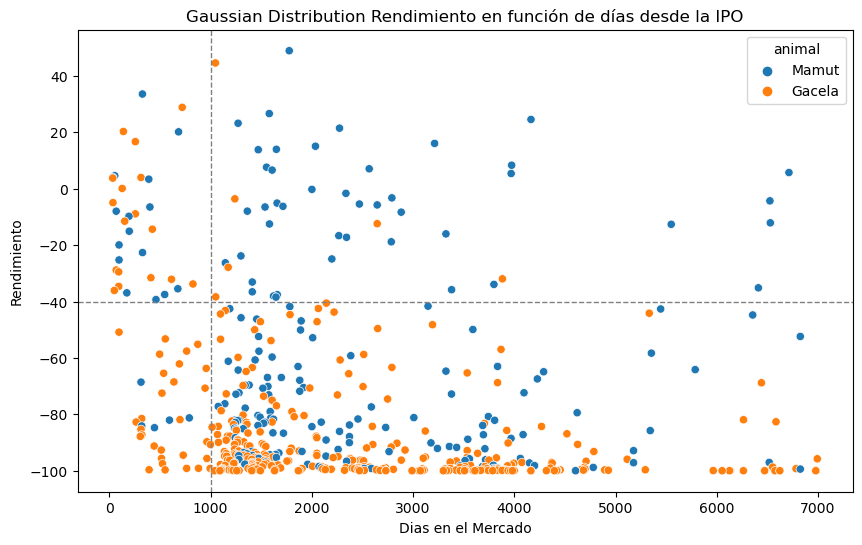

In [7]:
plt.figure(figsize=(10, 6))
df_filtered = df[(df['Fall'] >= -100) & (df['Fall'] <= 50) & (df['days'] <= 7000)]
sns.scatterplot(x='days', y='Fall', hue= 'animal', data= df_filtered)
plt.axhline(y=-40, color='grey', linestyle='--', linewidth=1)  # Horizontal line at y=-40
plt.axvline(x=1000, color='grey', linestyle='--', linewidth=1)  # Vertical line at x=1000
plt.title("Gaussian Distribution Rendimiento en función de días desde la IPO")
plt.xlabel("Dias en el Mercado")
plt.ylabel("Rendimiento")
plt.show()

In [8]:
# Define the quadrant boundaries
x_boundary = 1000  # Vertical line at x=1000
y_boundary = -40   # Horizontal line at y=-40

# Calculate counts for each quadrant
quadrant_1 = df_filtered[(df_filtered['days'] > x_boundary) & (df_filtered['Fall'] > y_boundary)]
quadrant_2 = df_filtered[(df_filtered['days'] <= x_boundary) & (df_filtered['Fall'] > y_boundary)]
quadrant_3 = df_filtered[(df_filtered['days'] <= x_boundary) & (df_filtered['Fall'] <= y_boundary)]
quadrant_4 = df_filtered[(df_filtered['days'] > x_boundary) & (df_filtered['Fall'] <= y_boundary)]

# Print the number of points in each quadrant
print("Numero de Empresas según cuadrante:")
print(f"Quadrant 1 (Beneficio Largo Plazo): {len(quadrant_1)}")
print(f"Quadrant 2 (Beneficio Corto Plazo): {len(quadrant_2)}")
print(f"Quadrant 3 (Pérdida Corto Plazo): {len(quadrant_3)}")
print(f"Quadrant 4 (Pérdida Largo Plazo): {len(quadrant_4)}")

Numero de Empresas según cuadrante:
Quadrant 1 (Beneficio Largo Plazo): 50
Quadrant 2 (Beneficio Corto Plazo): 33
Quadrant 3 (Pérdida Corto Plazo): 35
Quadrant 4 (Pérdida Largo Plazo): 413


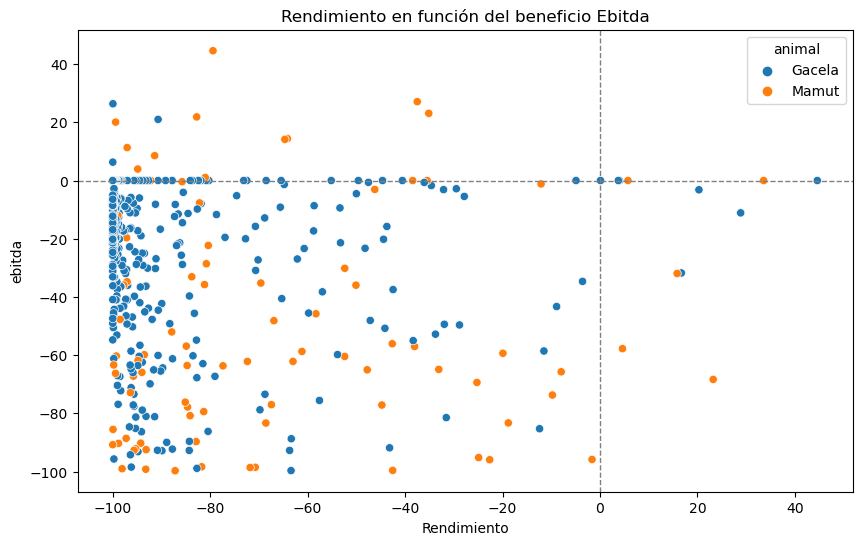

In [9]:
plt.figure(figsize=(10, 6))
df_filtered = df[(df['Fall'] >= -100) & (df['Fall'] <= 50) & (df['ebitdaM']  >= -100) & (df['ebitdaM'] <= 50) ]
sns.scatterplot(x='Fall', y='ebitdaM', hue= 'animal', data= df_filtered)
plt.axhline(y=-0, color='grey', linestyle='--', linewidth=1)  # Horizontal line at y=-40
plt.axvline(x=0, color='grey', linestyle='--', linewidth=1)  # Vertical line at x=1000
plt.title("Rendimiento en función del beneficio Ebitda")
plt.xlabel("Rendimiento")
plt.ylabel("ebitda")
plt.show()

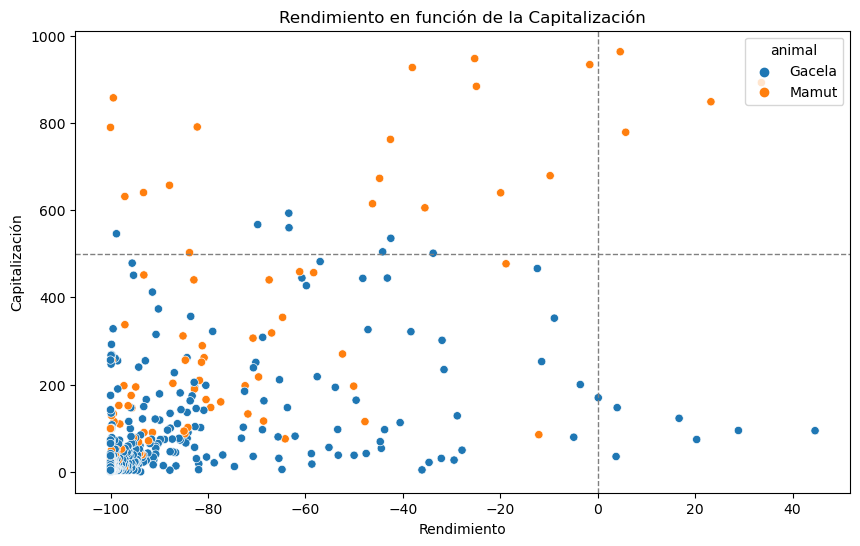

In [10]:
plt.figure(figsize=(10, 6))
df_filtered = df[(df['Fall'] >= -100) & (df['Fall'] <= 50) & (df['ebitdaM']  >= -100) & (df['ebitdaM'] <= 50) & (df['MarketCap_M'] <= 1000) ]
sns.scatterplot(x='Fall', y='MarketCap_M', hue= 'animal', data= df_filtered)
plt.axhline(y=500, color='grey', linestyle='--', linewidth=1)  # Horizontal line at y=-40
plt.axvline(x=0, color='grey', linestyle='--', linewidth=1)  # Vertical line at x=1000
plt.title("Rendimiento en función de la Capitalización")
plt.xlabel("Rendimiento")
plt.ylabel("Capitalización")
plt.show()

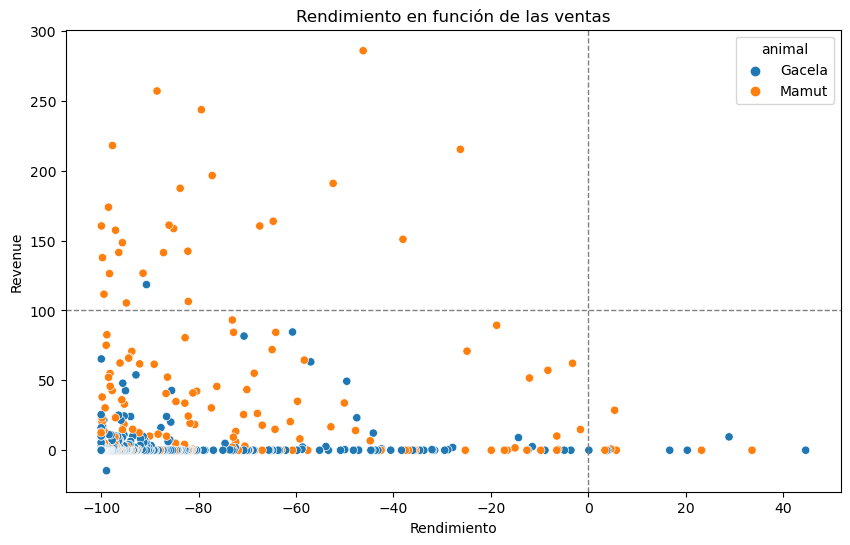

In [11]:
plt.figure(figsize=(10, 6))
df_filtered = df[(df['Fall'] >= -100) & (df['Fall'] <= 50)  & (df['MarketCap_M'] <= 1000) & (df['revenueM'] <= 300) ]
sns.scatterplot(x='Fall', y='revenueM', hue= 'animal', data= df_filtered)
plt.axhline(y=100, color='grey', linestyle='--', linewidth=1)  # Horizontal line at y=-40
plt.axvline(x=0, color='grey', linestyle='--', linewidth=1)  # Vertical line at x=1000
plt.title("Rendimiento en función de las ventas")
plt.xlabel("Rendimiento")
plt.ylabel("Revenue")
plt.show()

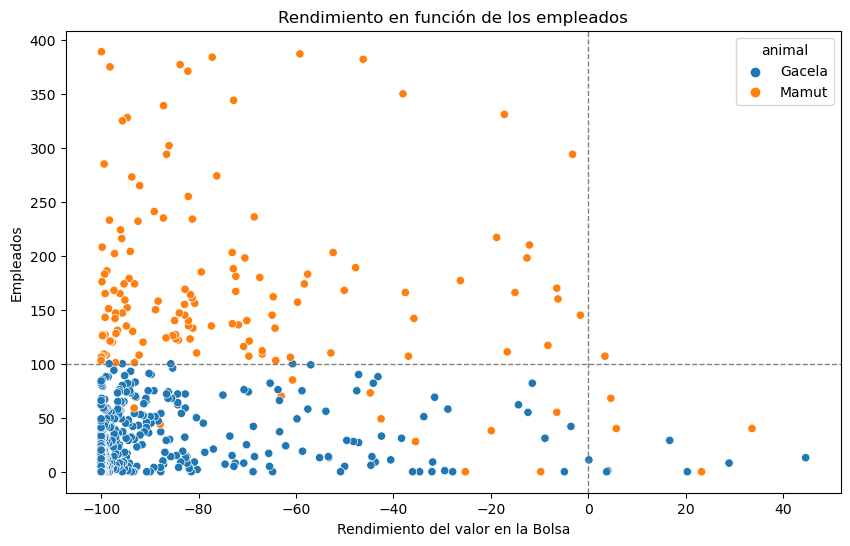

In [24]:
plt.figure(figsize=(10, 6))
df_filtered = df[(df['Fall'] >= -100) & (df['Fall'] <= 50)  & (df['MarketCap_M'] <= 1000) & (df['Employees'] <= 400) ]
sns.scatterplot(x='Fall', y='Employees', hue= 'animal', data= df_filtered)
plt.axhline(y=100, color='grey', linestyle='--', linewidth=1)  # Horizontal line at y=-40
plt.axvline(x=0, color='grey', linestyle='--', linewidth=1)  # Vertical line at x=1000
plt.title("Rendimiento en función de los empleados")
plt.xlabel("Rendimiento del valor en la Bolsa")
plt.ylabel("Empleados")
plt.show()

In [12]:
# Mapa de correlaciones,vemos que no aporta gran cosa
numeric_columns = df.select_dtypes(include=['number']).columns                
correlation_matrix = df[numeric_columns].corr() 
sns.heatmap(correlation_matrix)

<Axes: >

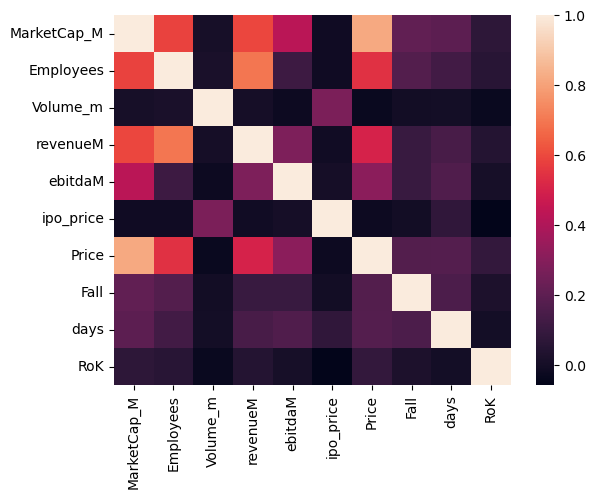

In [13]:
sns.heatmap(correlation_matrix)

# PRE-SELECCIÓN DE EMPRESAS

In [70]:
df_target = df[(df['Fall'] >= -30) & (df['Fall'] <= 1000) & (df['MarketCap_M'] <= 600) & (df['days'] <= 2000)]
print(len(df_target))
df_target = df_target.sort_values(by=['days'], ascending=[True])
df_target = df_target.reset_index()
df_target[['Ticker', 'Company', 'ipo_date','days','Fall', 'MarketCap_M', 'Employees', 'ebitdaM','RoK','revenueM','term','profit','animal']]

21


,Ticker,Company,ipo_date,days,Fall,MarketCap_M,Employees,ebitdaM,RoK,revenueM,term,profit,animal
0,JUNS,Jupiter Neurosciences Inc,2024-12-03,14,122.40,337.64,4,0.00,0.00,0.00,New,Alive,Gacela
1,MDCX,Medicus Pharma Ltd,2024-11-14,33,3.77,34.86,0,0.00,0.00,0.00,New,Alive,Gacela
2,IZTC,Invizyne Technologies Inc,2024-11-13,34,75.38,148.27,29,-4.68,-3.16,-0.00,New,Alive,Gacela
3,ACOG,Alpha Cognition Inc,2024-11-12,35,-4.91,79.14,0,0.00,0.00,0.00,New,Alive,Gacela
4,CAMP,CAMP4 Therapeutics Corp,2024-10-11,67,-28.82,128.22,58,-49.62,-38.70,0.35,New,Dead,Gacela
5,IBO,Impact BioMedical Inc,2024-09-16,92,-29.48,26.69,1,-2.82,-10.57,0.00,New,Dead,Gacela
6,ACTU,Actuate Therapeutics Inc,2024-08-13,126,0.12,169.73,11,0.00,0.00,0.00,New,Alive,Gacela
7,OSTX,OS Therapies Inc,2024-08-01,138,20.32,73.91,0,-3.18,-4.30,0.00,New,Alive,Gacela
8,ARTV,Artiva Biotherapeutics Inc,2024-07-19,151,-11.50,252.61,82,-58.57,-23.19,2.60,New,Dead,Gacela
9,INBX,Inhibrx Biosciences Inc,2024-06-04,196,-15.05,210.77,166,-300.93,-142.78,1.69,New,Dead,Mamut


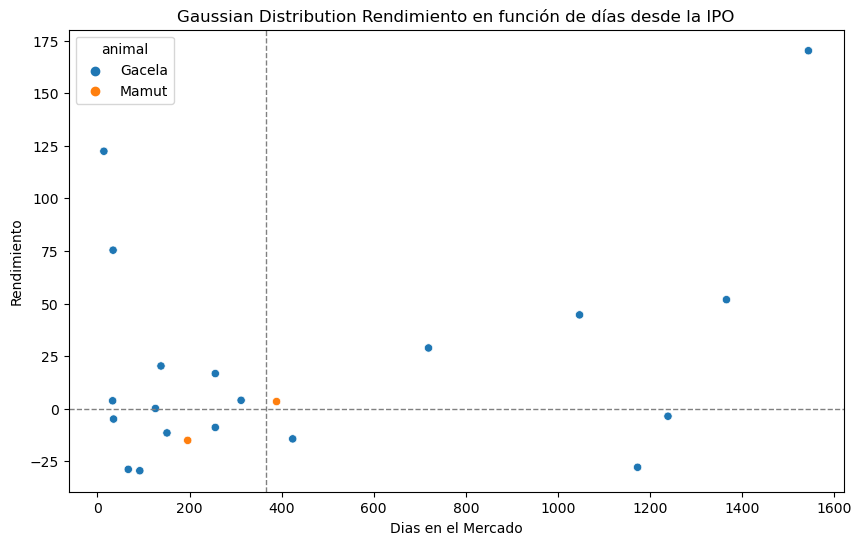

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='days', y='Fall', hue= 'animal', data= df_target)
plt.axhline(y=-0, color='grey', linestyle='--', linewidth=1)  # Horizontal line at y=-40
plt.axvline(x=365, color='grey', linestyle='--', linewidth=1)  # Vertical line at x=1000
plt.title("Gaussian Distribution Rendimiento en función de días desde la IPO")
plt.xlabel("Dias en el Mercado")
plt.ylabel("Rendimiento")
plt.show()

In [71]:
# Extract the 'Ticker' column into a list
ticker_target_list = df_target['Ticker'].tolist()

# Convert the list back to a DataFrame for saving to CSV
ticker_target_list = pd.DataFrame(ticker_target_list, columns=['Ticker'])

# Save to directory
output_directory = "output"
# Create the directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

date_string = datetime.now().strftime("%Y-%m-%d")
file_name = f"ticker_target_list_{date_string}_.csv"

# Construct the full path
file_path = os.path.join(output_directory, file_name)

# Save the DataFrame to a CSV file
ticker_target_list.to_csv(file_path, index=False)

print(f"DataFrame has been saved to: {file_path}")


DataFrame has been saved to: output\ticker_target_list_2024-12-18_.csv


<Figure size 1000x600 with 0 Axes>

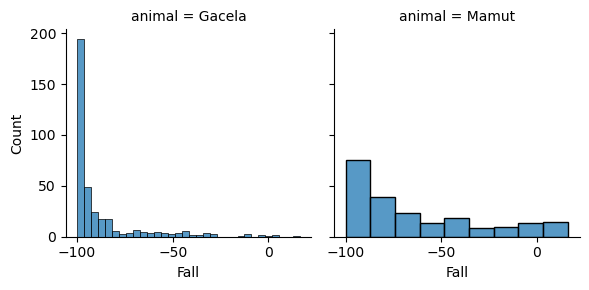

In [15]:
plt.figure(figsize=(10, 6))
#df_filtered = df[(df_filtered['Fall'] >= -150) & (df['Fall'] <= 20)]
df_filtered = df[(df['Fall'] >= -100) & (df['Fall'] <= 20)]
g = sns.FacetGrid(df_filtered, col='animal')
g.map(sns.histplot, "Fall");

<Figure size 1000x600 with 0 Axes>

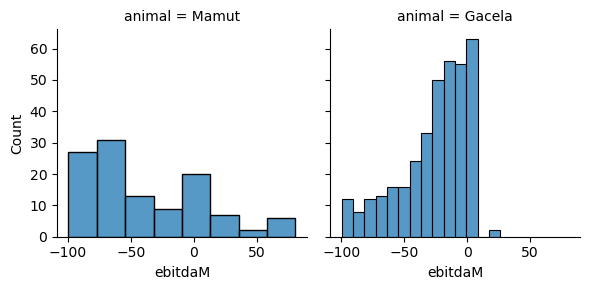

In [16]:
plt.figure(figsize=(10, 6))
#df_filtered = df[(df_filtered['Fall'] >= -150) & (df['Fall'] <= 20)]
df_filtered = df[(df['ebitdaM'] >= -100) & (df['ebitdaM'] <= 100)]
g = sns.FacetGrid(df_filtered, col='animal')
g.map(sns.histplot, "ebitdaM");

<Figure size 1000x600 with 0 Axes>

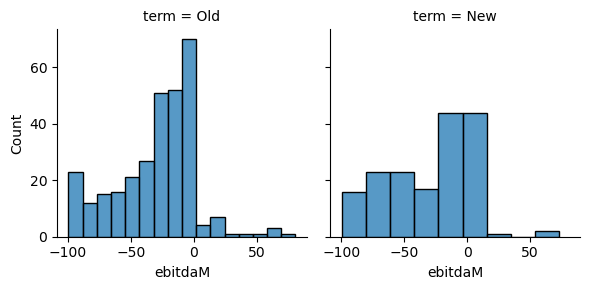

In [17]:
plt.figure(figsize=(10, 6))
#df_filtered = df[(df_filtered['Fall'] >= -150) & (df['Fall'] <= 20)]
df_filtered = df[(df['ebitdaM'] >= -100) & (df['ebitdaM'] <= 100)]
g = sns.FacetGrid(df_filtered, col='term')
g.map(sns.histplot, "ebitdaM");

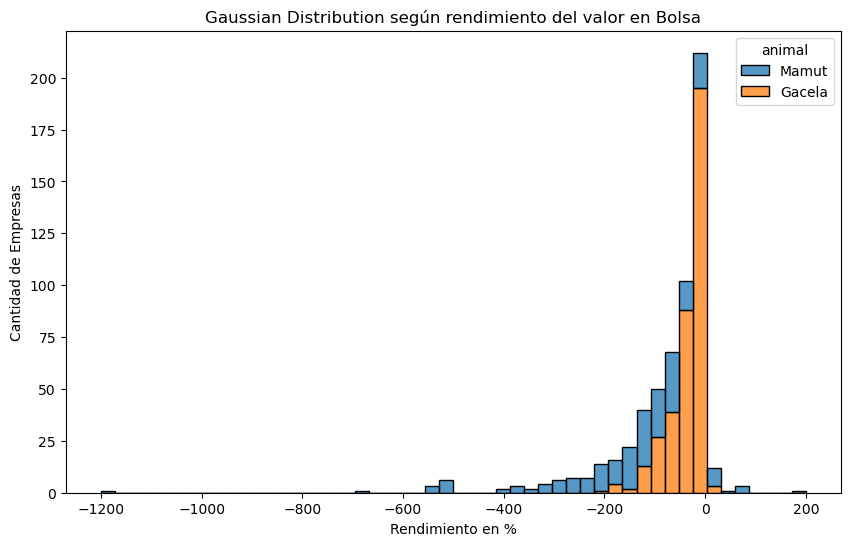

In [19]:
plt.figure(figsize=(10, 6))
df_filtered = df[(df['Fall'] >= -150) & (df['Fall'] <= 15)]

sns.histplot(x='ebitdaM', hue='animal', data=df_filtered, bins=50,  multiple='stack')
plt.title("Gaussian Distribution según rendimiento del valor en Bolsa")
plt.xlabel("Rendimiento en %")
plt.ylabel("Cantidad de Empresas")
plt.show()